In [1]:
import pandas as pd
from typing import NamedTuple,List,Dict
import random
import scipy.stats as st
import tqdm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import json
from plot_tool import draw_vector
from sklearn.linear_model import LinearRegression
import math

In [2]:
def direction(w:np.array)->np.array:
    w_len = math.sqrt(np.dot(w,w))
    return [w_i/w_len for w_i in w]

In [3]:
movie_vectors = {}
user_vectors = {}
with open('../DataScience/movie_vectors.txt') as f:
  movie_vectors = json.load(f)
with open('../DataScience/user_vectors.txt') as f:
  user_vectors = json.load(f)


In [4]:
original_vector = [vector for vector in movie_vectors.values()]
means = np.array(original_vector).mean(axis=0)
means_vector = [[vector[0]-means[0],vector[1]-means[1]]for vector in original_vector]
vector_df = pd.DataFrame(data=original_vector,columns=["x","y"])
# vector_df["x_demean"] = vector_df[x]
mean = vector_df.mean(axis = 0)
mean_df = vector_df.sub([mean.x,mean.y])
vector_df['x_mean'] = mean_df.x
vector_df['y_mean'] = mean_df.y
means_vector

[[-0.41241628167318867, -0.11708246915716913],
 [-0.4372602511435708, 0.38776691234419325],
 [-0.09759709557132079, 0.3261978016222844],
 [-0.13891845241285417, -0.3460658599821703],
 [-0.38411768907292343, 0.47807969340259204],
 [-0.6028727778627432, 0.10158105837280174],
 [-0.09038827567004137, -0.5721749689539023],
 [-0.3826583417855203, -0.33468680678321616],
 [-0.043510654839681084, -0.8417558399121673],
 [0.17221656557250586, -1.1321718881099243],
 [-0.3713750403862195, -0.17475482463025382],
 [-0.3549931540118596, -0.7084145547717399],
 [0.20739013833845932, -0.8931952003505067],
 [-0.08777884935879743, -0.8640567501875037],
 [-0.677898080395964, 0.32055151809069843],
 [-0.13613913471322459, -0.2069131548241926],
 [-0.25524433309101147, 0.18275700136517103],
 [0.006485279828585044, -0.1478177882991103],
 [-0.6214675510478318, 0.05637463321607972],
 [-0.13816291504847, -0.3463913092187626],
 [-0.03209416508984275, 0.33089300996343757],
 [-0.8514104970844136, 0.22094502121452808],

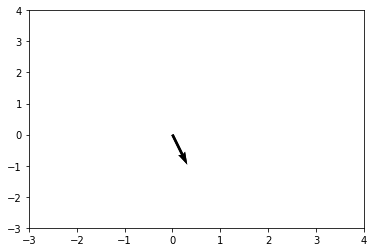

array([ 0.79901362, -1.61997297])

In [5]:
pca = PCA(n_components=1)
pca.fit(means_vector)
X_pca = pca.transform(means_vector)
X_new = pca.inverse_transform(X_pca)
components = pca.components_
plt.xlim(-3, 4)
plt.ylim(-3, 4)
draw_vector(plt,components,[[0,0],[0,0]])
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.show()
components
var_point = np.dot(direction(components[0]),[2.35349,-0.853264])
components[0]*var_point

In [6]:
vector_df["x_new"] = X_new[:, 0]
vector_df["y_new"] = X_new[:, 1]



(-3.0, 4.0)

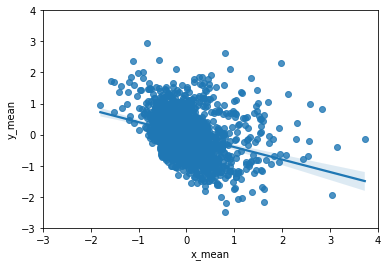

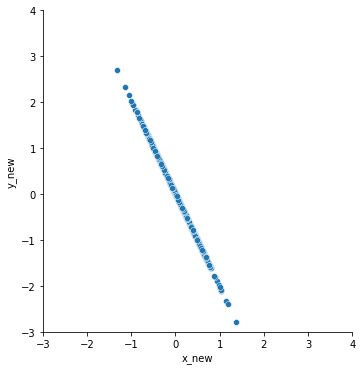

In [7]:
sns.regplot(x="x_mean",y="y_mean",data=vector_df)
plt.xlim(-3, 4)
plt.ylim(-3, 4)
sns.relplot(x="x_new",y="y_new",data=vector_df)

plt.xlim(-3, 4)
plt.ylim(-3, 4)

In [8]:
regr = LinearRegression()


arr = np.array(original_vector)
x_arr = [[i] for i in arr[:,0]]
y_arr = arr[:,1]
regr.fit(x_arr, y_arr)
y_pred = regr.predict(x_arr)
x_arr
# len(y_arr)

[[-1.788027725977197],
 [-1.8128716954475792],
 [-1.4732085398753292],
 [-1.5145298967168626],
 [-1.7597291333769318],
 [-1.9784842221667516],
 [-1.4659997199740498],
 [-1.7582697860895287],
 [-1.4191220991436895],
 [-1.2033948787315025],
 [-1.7469864846902279],
 [-1.730604598315868],
 [-1.168221305965549],
 [-1.4633902936628058],
 [-2.0535095246999724],
 [-1.511750579017233],
 [-1.6308557773950199],
 [-1.3691261644754233],
 [-1.9970789953518402],
 [-1.5137743593524784],
 [-1.4077056093938511],
 [-2.227021941388422],
 [-1.469459451469617],
 [-1.418307640379467],
 [-1.678597920705803],
 [-1.5319374917161808],
 [-1.923562982944082],
 [-2.004544467154238],
 [-1.5474586614854327],
 [-1.9179743205128092],
 [-1.8868990437563615],
 [-0.9366720415086482],
 [-1.7653307282843869],
 [-2.0346324135062344],
 [-1.0489926721207612],
 [-0.9411222962265782],
 [-0.12892904959576823],
 [-1.8615716164099287],
 [-1.232372541827663],
 [-1.5645320868738126],
 [-0.8245617691930097],
 [-1.3065679533749197],
 [

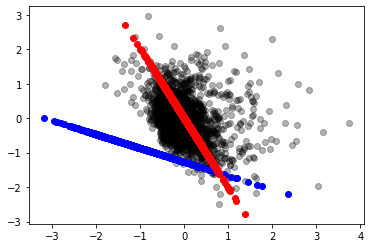

In [10]:
plt.scatter(vector_df.x_mean, vector_df.y_mean, color='black',alpha=0.3)
plt.scatter(x_arr, y_pred, color='blue')
plt.scatter(vector_df.x_new,vector_df.y_new, color='red')
plt.show()
# y_pred
# x_arr
# draw_vector(plt,components,[[0,0],[0,0]])